In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [453]:
dataset = pd.read_csv('./50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [454]:
dataset["State"] = dataset['State'].astype('category')

In [455]:
dataset['State'].nbytes

74

In [456]:
y = np.asarray(dataset['Profit'].values.tolist())

dataset.drop(axis=1,columns=['Profit'],inplace=True)

In [457]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [458]:
encoded_dataset = pd.get_dummies(dataset, columns=['State'])

In [459]:
encoded_dataset.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False


In [460]:
X = np.asarray(encoded_dataset.values.tolist())

In [461]:
print("Shape of train Data",X.shape)
print("Shape of train Data",y.shape)

Shape of train Data (50, 6)
Shape of train Data (50,)


In [462]:
y = y.reshape(-1,1)
y.shape

(50, 1)

In [463]:
X.shape

(50, 6)

In [464]:
#feature Scaling
for i in range(X.shape[1]-3):
    X[:,i] = ((X[:,i]-np.mean(X[:,i]))/np.std(X[:,i]))


y = (y - np.mean(y))/np.std(y)

In [465]:
X = np.concatenate((X,np.ones((50,1))),axis = 1)

In [466]:
#utility Methods

def split_data(X,y,test_size=0.3,random_state = 0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    data_test_size = int(X.shape[0]*test_size)


    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]


    return X_train,y_train,X_test,y_test




In [467]:
class MultipleLinearRegression():
    def __init__(self):
        pass


    def forward(self,X,y,W):
        # print(X,W,'data')
        y_pred = sum(X*W)
        # print(y_pred)
        loss = ((y-y_pred)**2)/2
        # print(loss,y_pred)
        return loss,y_pred


    def UpdateWeights(self,W,X,y_pred,y_true,alpha,index):
        # print(X)
        for i in range(X.shape[1]):
            W[i] -= (alpha*(y_pred-y_true[index])*X[index][i])
        return W

    def train(self,X,y,epochs = 10,alpha=0.001,random_state=0):


        num_rows = X.shape[0]
        num_cols = X.shape[1]

        W = np.random.randn(1,num_cols) / np.sqrt(num_rows)

        train_loss = []
        num_epochs = []
        train_indices = [i for i in range(X.shape[0])]

        for j in range(epochs):
            cost = 0
            np.random.seed(random_state)
            np.random.shuffle(train_indices)
            for i in train_indices:
                loss,y_pred = self.forward(X[i],y[i],W[0])
                # print(loss,y_pred)
                cost+=loss
                W[0] = self.UpdateWeights(W[0],X,y_pred,y,alpha,i)
            train_loss.append(cost)
            # print(cost)
            num_epochs.append(j)
        return W[0],train_loss, num_epochs
    
    def test(self,X_test,y_test,W_trained):
        test_pred = []
        test_loss = []
        test_indices = [i for i in range(X_test.shape[0])]

        for i in test_indices:
            loss , y_test_pred = self.forward(X_test[i],y_test[i],W_trained)
            test_pred.append(y_test_pred)
            test_loss.append(loss)

        return test_pred, test_loss
    

    def predict(self,W_trained, X_sample):
        prediction = sum(W_trained*X_sample)
        return prediction
    
    def plotLoss(self,loss,epochs):
        plt.plot(epochs,loss)
        plt.xlabel('Number of Epochs')
        plt.ylabel('Loss')
        plt.title('Plot Loss')
        plt.show()

    


In [468]:
X_train,y_train,X_test,y_test = split_data(X,y)
regressor = MultipleLinearRegression()

In [469]:
W_trained, train_loss,num_epochs = regressor.train(X_train,y_train,epochs=45,alpha=0.0001)

C:\Users\tarun\AppData\Local\Temp\ipykernel_6776\1225431934.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i] -= (alpha*(y_pred-y_true[index])*X[index][i])


In [470]:
test_pred,test_loss = regressor.test(X_test,y_test, W_trained)

[array([29.88750261]), array([29.49171604]), array([29.10164691]), array([28.71722352]), array([28.33837302]), array([27.96500467]), array([27.59710677]), array([27.23453326]), array([26.87717926]), array([26.52501187]), array([26.17797908]), array([25.83594988]), array([25.49889133]), array([25.16669477]), array([24.83927288]), array([24.51660891]), array([24.19859878]), array([23.88523192]), array([23.57638588]), array([23.27195442]), array([22.97196559]), array([22.67635046]), array([22.3849538]), array([22.09779341]), array([21.81479738]), array([21.5358616]), array([21.26095669]), array([20.99003236]), array([20.72300306]), array([20.45980688]), array([20.20039464]), array([19.94475452]), array([19.69282861]), array([19.44447943]), array([19.19974786]), array([18.95854526]), array([18.72078493]), array([18.48649573]), array([18.25558518]), array([18.02797147]), array([17.80362078]), array([17.58251652]), array([17.36457783]), array([17.14979137]), array([16.93805001])]


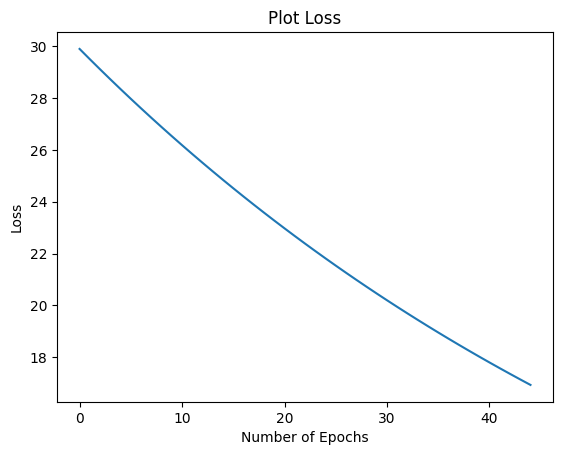

In [471]:
print(train_loss)
regressor.plotLoss(train_loss,num_epochs)

In [472]:
##Multiple Linear Regression using SkLearn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [473]:
df_skl = pd.read_csv('./50_Startups.csv')
df_skl.head()

y_sk = df_skl.iloc[:,-1].values
X_sk = df_skl.iloc[:,:-1].values

print(X_sk[0],y[0])

[165349.2 136897.8 471784.1 'New York'] [2.01120333]


In [474]:
lblEnc_Sk = LabelEncoder()
X_sk[:,3] = lblEnc_Sk.fit_transform(X_sk[:,3])


onehotenc = OneHotEncoder(handle_unknown='ignore')
X_sk_cat = onehotenc.fit_transform(X_sk[:,3].reshape(-1,1)).toarray()
X_sk = np.concatenate((X_sk,X_sk_cat),axis=1)
X_sk[0]

array([165349.2, 136897.8, 471784.1, 2, 0.0, 0.0, 1.0], dtype=object)

In [475]:
X_sk = X_sk[:,[0,1,2,4,5,6]]

In [476]:
y_sk = y_sk.reshape((50,1))

In [477]:
X_train_sk,X_test_sk,y_train_sk,y_test_sk = train_test_split(X_sk,y_sk,test_size=0.2,random_state=0)
X_train_sk.shape,y_train_sk.shape,X_test_sk.shape,y_test_sk.shape

((40, 6), (40, 1), (10, 6), (10, 1))

In [478]:
regressor_sk = LinearRegression()
regressor_sk.fit(X_train_sk,y_train_sk)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [479]:
y_pred_sk = regressor_sk.predict(X_test_sk)

In [484]:
print(regressor_sk.predict([[165000,140000,5000000,0,1,0]]))

[[356870.94323294]]


In [485]:
pred = regressor.predict(W_trained,[165000,140000,5000000,0,1,0,1])
print(pred)

346189.2761563975


In [482]:
print(W_trained)

[ 0.11118821 -0.07663847  0.06771443 -0.12159185  0.12287892 -0.04444205
  0.31221192]


In [ ]:
regressor_sk.